# Haberman Breast Cancer Survival Prediction

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling

## Problem Definition

## Data

The sample dataset is taken from Jason Brownlee's [github page](https://www.kaggle.com/datasets/slmsshk/pndm-prediction-dataset). The dataset has 3 features to be used predicting the label which is Surv_status columns in the dataset. You can see the data dictionary [here](./Data/README.md).

## Evaluation

If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

> ⚠️ **Important:** Due to the nature of experimentation, the evaluation metric may change over time.

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('ticks')
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# DNN Related Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
columns = ['Age', 'Op_Year', 'axil_nodes', 'Surv_status']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = pd.read_csv(url, header=None, names=columns)
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Data Exploration (Exploratory Data Analysis - EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

- What question(s) are you trying to solve?
- What kind of data do we have and how do we treat different types?
- What's missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

In [3]:
df.shape # rows and columns

(306, 4)

In [4]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


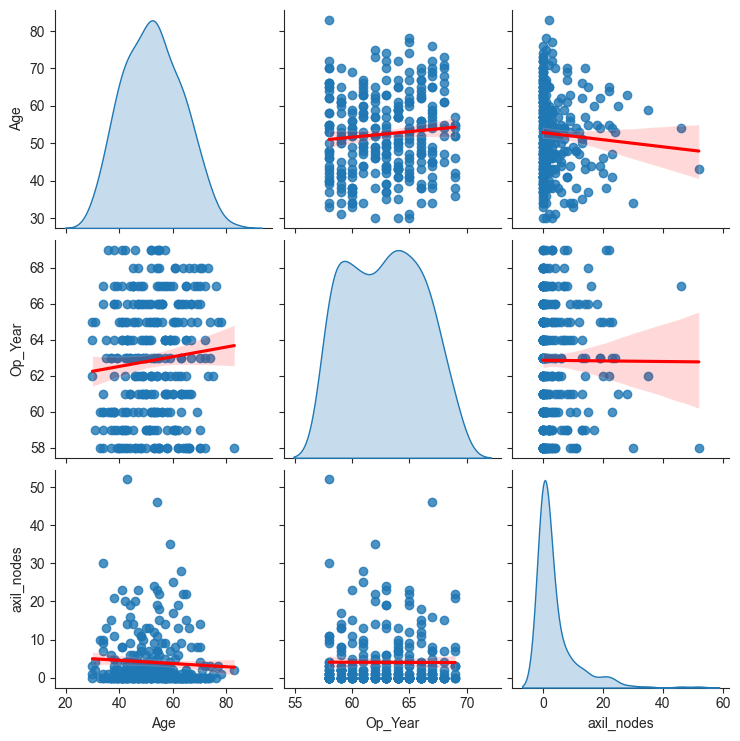

In [6]:
sb.pairplot(df.drop('Surv_status', axis=1), kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color':'red'}})

In [7]:
count = len(df['Surv_status'])
count_1 = df['Surv_status'].value_counts()[1]
count_2 = df['Surv_status'].value_counts()[2]
print('1: %d %.2f%%' % (count_1, (count_1 / count) * 100))
print('2: %d %.2f%%' % (count_2, (count_2 / count * 100)))

1: 225 73.53%
2: 81 26.47%


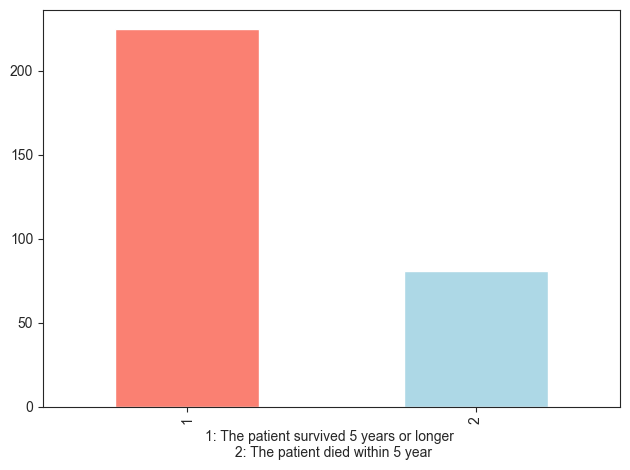

In [8]:
df['Surv_status'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('1: The patient survived 5 years or longer \n 2: The patient died within 5 year')
plt.tight_layout()
plt.show()

In [9]:
def plot_dist(feature):
  fig, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios':(0.15, 0.85)})

  sb.boxplot(data=df, x=feature, color='lightblue', ax=ax_box)
  sb.histplot(data=df, x=feature, ax=ax_hist, kde=True, hue='Surv_status')

  plt.tight_layout()
  plt.show()

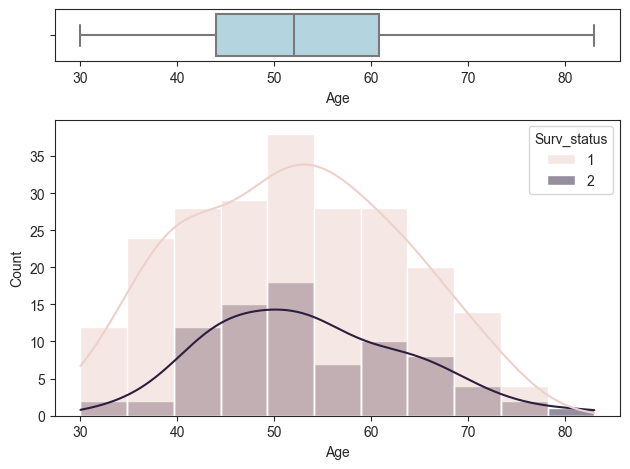

In [10]:
plot_dist('Age')

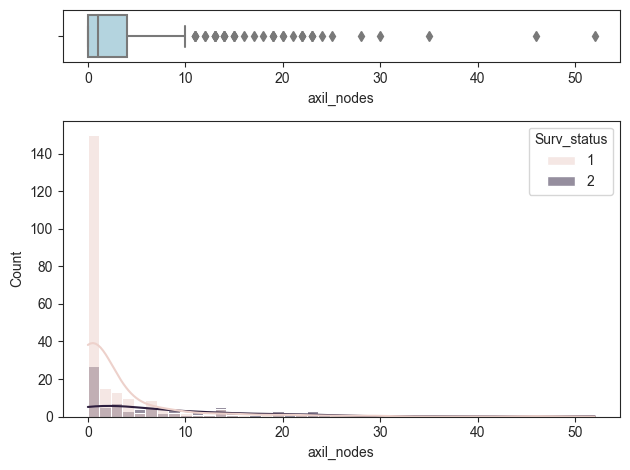

In [11]:
plot_dist('axil_nodes')

## Data Preprocessing

### Determine the Features and Targets

In [12]:
x = df.drop('Surv_status', axis=1).values.astype('float32')
y = df['Surv_status'].values
y = LabelEncoder().fit_transform(y)

### Train & Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=101)

## Modelling

In [14]:
def plot_training_history(history):
  fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(12, 6))
  ax_loss.plot(history.history['loss'])
  ax_loss.plot(history.history['val_loss'])
  ax_loss.set_title('History of Loss')
  ax_loss.set_xlabel('Epochs')
  ax_loss.set_ylabel('Loss')
  ax_loss.legend(['Training', 'Validation'], loc='upper right')
    
  ax_acc.plot(history.history['accuracy'])
  ax_acc.plot(history.history['val_accuracy'])
  ax_acc.set_title('History of Accuracy')
  ax_acc.set_xlabel('Epochs')
  ax_acc.set_ylabel('Accuracy')
  ax_acc.legend(['Training', 'Validation'], loc='lower right')
    
  plt.tight_layout()
  plt.show()

In [15]:
n_features = x.shape[1]
max_epochs = 200

2023-05-22 22:03:40.270250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


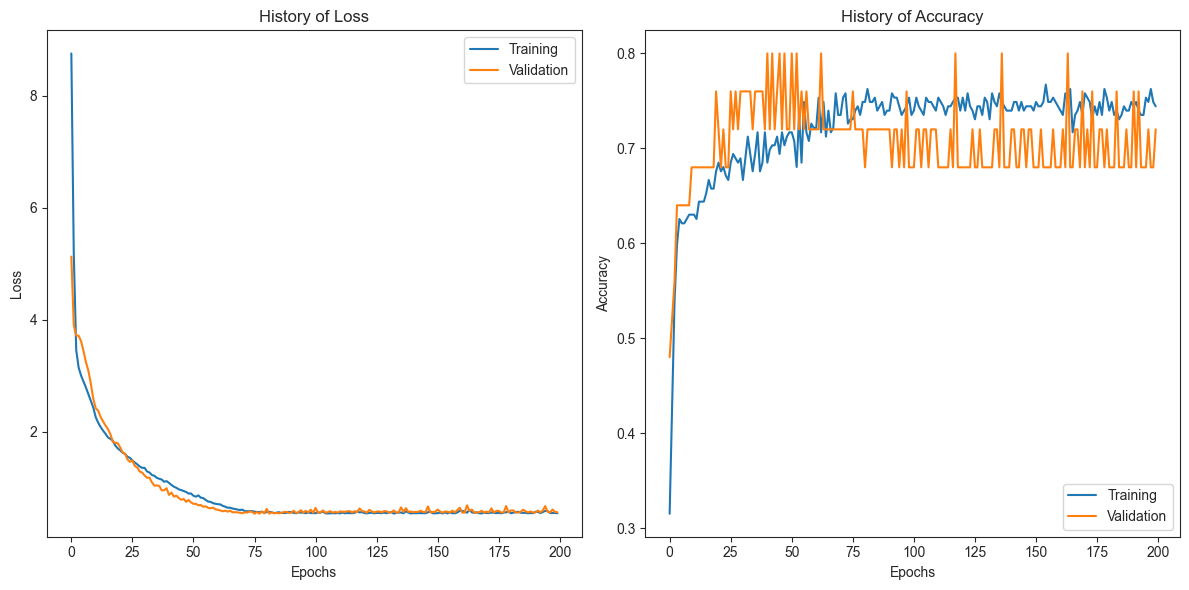

In [16]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=max_epochs, batch_size=16, 
                    verbose=0, validation_split=0.1)

plot_training_history(history)

In [17]:
y_pred = model.predict(x_test, verbose=0)

acc = accuracy_score(y_test, np.argmax(y_pred, axis=1)) * 100

print('Accuracy: {0:.2f}%'.format(acc))

Accuracy: 72.58%


In [18]:
nr_folds = 10
kfold = StratifiedKFold(nr_folds, shuffle=True, random_state=101)

scores = list()
counter = 1
for train_ix, test_ix in kfold.split(x, y):
  # split data
  x_train, x_test, y_train, y_test = x[train_ix], x[test_ix], y[train_ix], y[test_ix]

  model = Sequential()
  model.add(Dense(10, activation='relu', input_shape=(n_features, )))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=max_epochs, batch_size=16, 
                    verbose=0, validation_split=0.1)
  
  y_pred = model.predict(x_test, verbose=0)

  acc = accuracy_score(y_test, np.argmax(y_pred, axis=1)) * 100
  scores.append(acc)
  print('> Fold %d / %d - Accuracy: %.2f%%' % (counter, nr_folds, acc))
  counter += 1

print('--------------------------------')
print('Mean Accuracy: %.2f%% (%.2f)' % (np.mean(scores), np.std(scores)))

> Fold 1 / 10 - Accuracy: 74.19%
> Fold 2 / 10 - Accuracy: 74.19%
> Fold 3 / 10 - Accuracy: 74.19%
> Fold 4 / 10 - Accuracy: 74.19%
> Fold 5 / 10 - Accuracy: 74.19%
> Fold 6 / 10 - Accuracy: 70.97%
> Fold 7 / 10 - Accuracy: 73.33%
> Fold 8 / 10 - Accuracy: 73.33%
> Fold 9 / 10 - Accuracy: 73.33%
> Fold 10 / 10 - Accuracy: 73.33%
--------------------------------
Mean Accuracy: 73.53% (0.94)


### Early Stopping

We'll turn the kfold evaluation process into a function to try with different models.

In [19]:
def evaluate_model(model, x, y):
    
    # Add nodes and display the number of nodes for each layer
    for i, layer in enumerate(model.layers):
        layer_name = layer.name
        num_nodes = layer.output_shape[-1]
        print(f"Layer: {layer_name}, Number of Nodes: {num_nodes}")
            
    nr_folds = 10
    kfold = StratifiedKFold(nr_folds, shuffle=True, random_state=101)

    scores = list()
    counter = 1
    for train_ix, test_ix in kfold.split(x, y):
        # split data
        x_train, x_test, y_train, y_test = x[train_ix], x[test_ix], y[train_ix], y[test_ix]

        early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

        model.fit(x_train, y_train, epochs=max_epochs, batch_size=16, 
                        verbose=0, validation_split=0.1, callbacks=[early_stop])

        y_pred = model.predict(x_test, verbose=0)

        acc = accuracy_score(y_test, np.argmax(y_pred, axis=1)) * 100
        scores.append(acc)
        print('> Fold %d / %d - Accuracy: %.2f%%' % (counter, nr_folds, acc))
        counter += 1

    print('--------------------------------')
    print('Mean Accuracy: %.2f%% (%.2f)' % (np.mean(scores), np.std(scores)))

In [20]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluate_model(model, x, y)

Layer: dense_22, Number of Nodes: 10
Layer: dense_23, Number of Nodes: 1
Epoch 6: early stopping
> Fold 1 / 10 - Accuracy: 74.19%
Epoch 63: early stopping
> Fold 2 / 10 - Accuracy: 74.19%
Epoch 10: early stopping
> Fold 3 / 10 - Accuracy: 74.19%
Epoch 6: early stopping
> Fold 4 / 10 - Accuracy: 74.19%
Epoch 6: early stopping
> Fold 5 / 10 - Accuracy: 74.19%
Epoch 10: early stopping
> Fold 6 / 10 - Accuracy: 70.97%
Epoch 7: early stopping
> Fold 7 / 10 - Accuracy: 73.33%
Epoch 10: early stopping
> Fold 8 / 10 - Accuracy: 73.33%
Epoch 8: early stopping
> Fold 9 / 10 - Accuracy: 73.33%
Epoch 33: early stopping
> Fold 10 / 10 - Accuracy: 73.33%
--------------------------------
Mean Accuracy: 73.53% (0.94)


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 Note: Adding early stopping didn't increase the predictive performance of the model however, it increase the speed.
</div>

### Increasing Layers and Number of Nodes

Now, let's check if increasing the number of nodes and layers will have a positive impact on the performance.

In [21]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(n_features, )))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluate_model(model, x, y)

Layer: dense_24, Number of Nodes: 20
Layer: dense_25, Number of Nodes: 50
Layer: dense_26, Number of Nodes: 50
Layer: dense_27, Number of Nodes: 1
Epoch 10: early stopping
> Fold 1 / 10 - Accuracy: 74.19%
Epoch 8: early stopping
> Fold 2 / 10 - Accuracy: 74.19%
Epoch 8: early stopping
> Fold 3 / 10 - Accuracy: 74.19%
Epoch 8: early stopping
> Fold 4 / 10 - Accuracy: 74.19%
Epoch 11: early stopping
> Fold 5 / 10 - Accuracy: 74.19%
Epoch 8: early stopping
> Fold 6 / 10 - Accuracy: 70.97%
Epoch 6: early stopping
> Fold 7 / 10 - Accuracy: 73.33%
Epoch 6: early stopping
> Fold 8 / 10 - Accuracy: 73.33%
Epoch 10: early stopping
> Fold 9 / 10 - Accuracy: 73.33%
Epoch 10: early stopping
> Fold 10 / 10 - Accuracy: 73.33%
--------------------------------
Mean Accuracy: 73.53% (0.94)


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
✍🏼 Note: Since the ratio of the records labeled 1 is around 73% of the entire dataset, the above mentioned accuracy shows that the performance of the proposed mode is poor. It seems that increasing the number of layers and nodes don't impact the performace. It's better to take a look at the data to enhance the predictive performance.
</div>

## Updating the Data

Let's check if scaling the data, or balancing the dataset by resampling will have impact on the performance of the model.

### Scaling the Data

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

evaluate_model(model, x_scaled, y)

Layer: dense_24, Number of Nodes: 20
Layer: dense_25, Number of Nodes: 50
Layer: dense_26, Number of Nodes: 50
Layer: dense_27, Number of Nodes: 1
Epoch 18: early stopping
> Fold 1 / 10 - Accuracy: 74.19%
Epoch 41: early stopping
> Fold 2 / 10 - Accuracy: 74.19%
Epoch 6: early stopping
> Fold 3 / 10 - Accuracy: 74.19%
Epoch 6: early stopping
> Fold 4 / 10 - Accuracy: 74.19%
Epoch 6: early stopping
> Fold 5 / 10 - Accuracy: 74.19%
Epoch 11: early stopping
> Fold 6 / 10 - Accuracy: 70.97%
Epoch 10: early stopping
> Fold 7 / 10 - Accuracy: 73.33%
Epoch 7: early stopping
> Fold 8 / 10 - Accuracy: 73.33%
Epoch 6: early stopping
> Fold 9 / 10 - Accuracy: 73.33%
Epoch 6: early stopping
> Fold 10 / 10 - Accuracy: 73.33%
--------------------------------
Mean Accuracy: 73.53% (0.94)


### Removing Outliers

In [23]:
df_clean = df[df['axil_nodes'] <= 10]
df_clean.shape

(266, 4)

In [24]:
count = len(df_clean['Surv_status'])
count_1 = df_clean['Surv_status'].value_counts()[1]
count_2 = df_clean['Surv_status'].value_counts()[2]
print('1: %d %.2f%%' % (count_1, (count_1 / count) * 100))
print('2: %d %.2f%%' % (count_2, (count_2 / count * 100)))

1: 208 78.20%
2: 58 21.80%


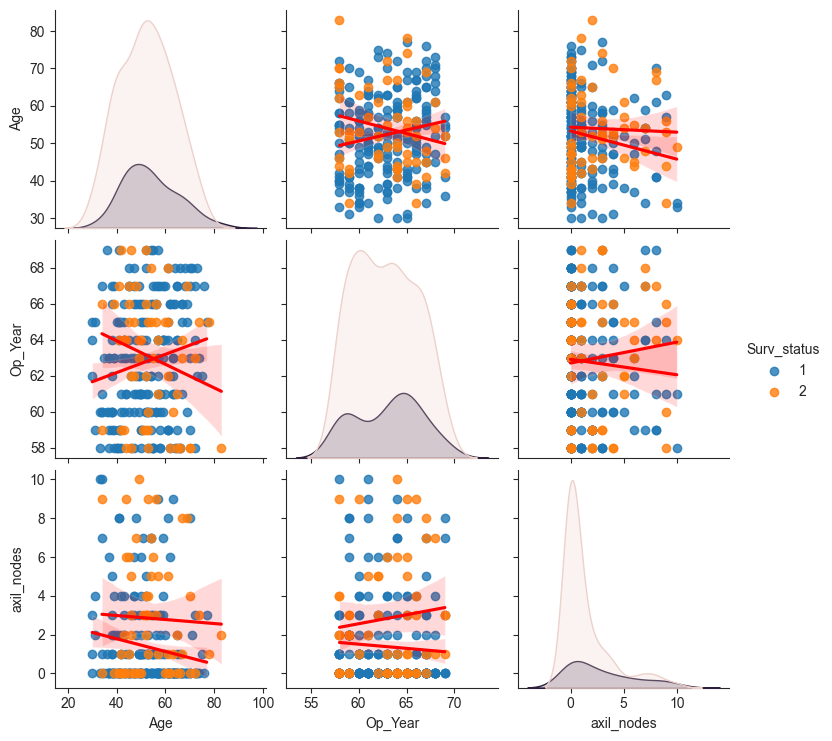

In [25]:
sb.pairplot(df_clean, kind='reg', diag_kind='kde', 
            plot_kws={'line_kws': {'color':'red'}}, hue='Surv_status')

In [26]:
x_clean = df_clean.drop('Surv_status', axis=1).values.astype('float32')
y_clean = df_clean['Surv_status'].values
y_clean = LabelEncoder().fit_transform(y_clean)

evaluate_model(model, x_clean, y_clean)

Layer: dense_24, Number of Nodes: 20
Layer: dense_25, Number of Nodes: 50
Layer: dense_26, Number of Nodes: 50
Layer: dense_27, Number of Nodes: 1
Epoch 10: early stopping
> Fold 1 / 10 - Accuracy: 77.78%
Epoch 6: early stopping
> Fold 2 / 10 - Accuracy: 77.78%
Epoch 22: early stopping
> Fold 3 / 10 - Accuracy: 77.78%
Epoch 13: early stopping
> Fold 4 / 10 - Accuracy: 77.78%
Epoch 13: early stopping
> Fold 5 / 10 - Accuracy: 77.78%
Epoch 11: early stopping
> Fold 6 / 10 - Accuracy: 77.78%
Epoch 15: early stopping
> Fold 7 / 10 - Accuracy: 80.77%
Epoch 9: early stopping
> Fold 8 / 10 - Accuracy: 80.77%
Epoch 10: early stopping
> Fold 9 / 10 - Accuracy: 76.92%
Epoch 16: early stopping
> Fold 10 / 10 - Accuracy: 76.92%
--------------------------------
Mean Accuracy: 78.21% (1.32)


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 Note: It seems that removing the outliers impacted the performance of the model in a positive way however, it's mostlikely because of the change in the ratio of 0s and 1s in the label.
</div>

### Oversampling with SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
oversample = SMOTE()
x_over, y_over = oversample.fit_resample(x_clean, y_clean)
np.unique(y_over, return_counts=True)

(array([0, 1]), array([208, 208]))

In [29]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluate_model(model, x_over, y_over)

Layer: dense_28, Number of Nodes: 10
Layer: dense_29, Number of Nodes: 1
Epoch 16: early stopping
> Fold 1 / 10 - Accuracy: 50.00%
Epoch 11: early stopping
> Fold 2 / 10 - Accuracy: 50.00%
Epoch 8: early stopping
> Fold 3 / 10 - Accuracy: 50.00%
Epoch 11: early stopping
> Fold 4 / 10 - Accuracy: 50.00%
Epoch 13: early stopping
> Fold 5 / 10 - Accuracy: 50.00%
Epoch 9: early stopping
> Fold 6 / 10 - Accuracy: 50.00%
Epoch 11: early stopping
> Fold 7 / 10 - Accuracy: 51.22%
Epoch 8: early stopping
> Fold 8 / 10 - Accuracy: 51.22%
Epoch 21: early stopping
> Fold 9 / 10 - Accuracy: 48.78%
Epoch 18: early stopping
> Fold 10 / 10 - Accuracy: 48.78%
--------------------------------
Mean Accuracy: 50.00% (0.77)


### Undersampling Randomly

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x_clean, y_clean)
np.unique(y_under, return_counts=True)

(array([0, 1]), array([58, 58]))

In [32]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluate_model(model, x_under, y_under)

Layer: dense_30, Number of Nodes: 10
Layer: dense_31, Number of Nodes: 1
Epoch 6: early stopping
> Fold 1 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 2 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 3 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 4 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 5 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 6 / 10 - Accuracy: 50.00%
Epoch 6: early stopping
> Fold 7 / 10 - Accuracy: 54.55%
Epoch 6: early stopping
> Fold 8 / 10 - Accuracy: 54.55%
Epoch 6: early stopping
> Fold 9 / 10 - Accuracy: 45.45%
Epoch 6: early stopping
> Fold 10 / 10 - Accuracy: 45.45%
--------------------------------
Mean Accuracy: 50.00% (2.87)


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 Note: Balancing the dataset had a negative impact on the model. It's not better than flipping a coin for now.
</div>

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=101)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 82.14%


## Conclusion & Futurework

In conclusion, despite various attempts to optimize the deep learning network for predicting breast cancer patient survival using the Haberman dataset, the performance remained poor compared to RandomForestClassifier. Feature engineering could be a potential avenue for improvement, as it may help in capturing more relevant information from the dataset. Future work should explore different feature engineering techniques, such as extracting additional domain-specific features or incorporating external data sources, to enhance the predictive power of the deep learning model.